# IPSLCM6_snow_bias_example (xarray, cartopy, xesmf)
Colormaps : https://matplotlib.org/examples/color/colormaps_reference.html

In [80]:
%matplotlib notebook

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point

In [83]:
import proplot as plot

findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.


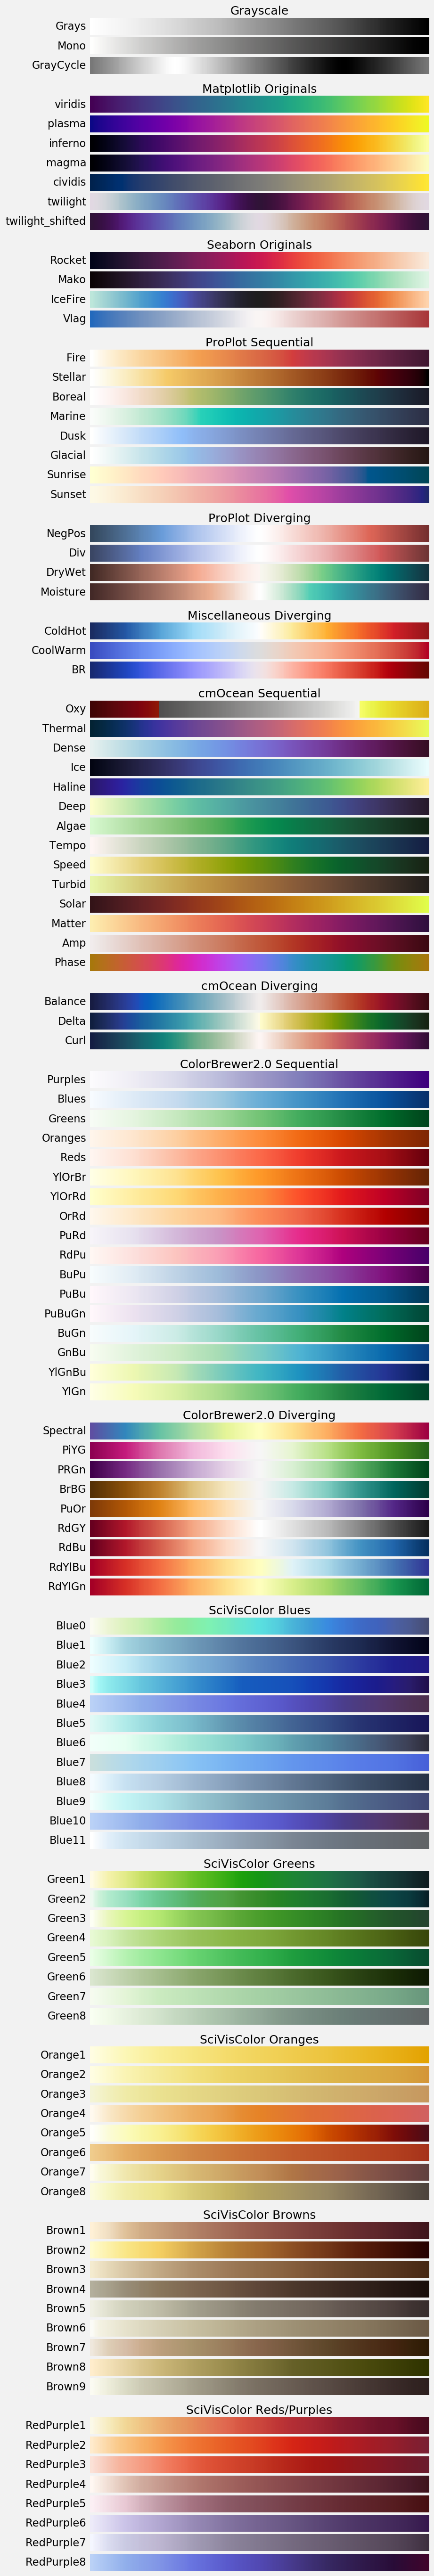

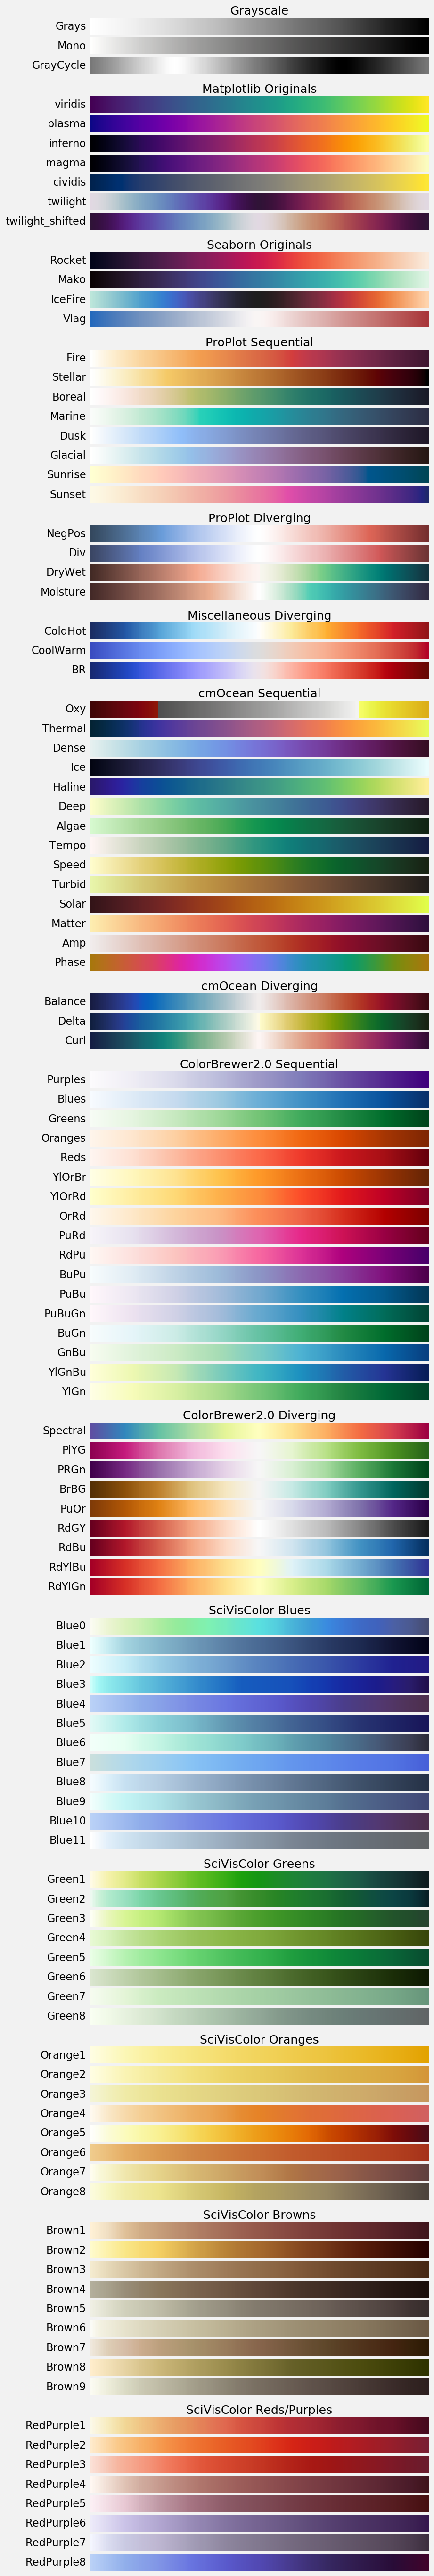

In [3]:
plot.show_cmaps()

## Load IPSL-CM6A-LR

In [73]:
da = xr.open_dataarray('snc_LImon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001.nc')
da

<xarray.DataArray 'snc' (lat: 143, lon: 144)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    time     datetime64[ns] ...
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

## ProPlot
https://proplot.readthedocs.io/en/latest/projection.html

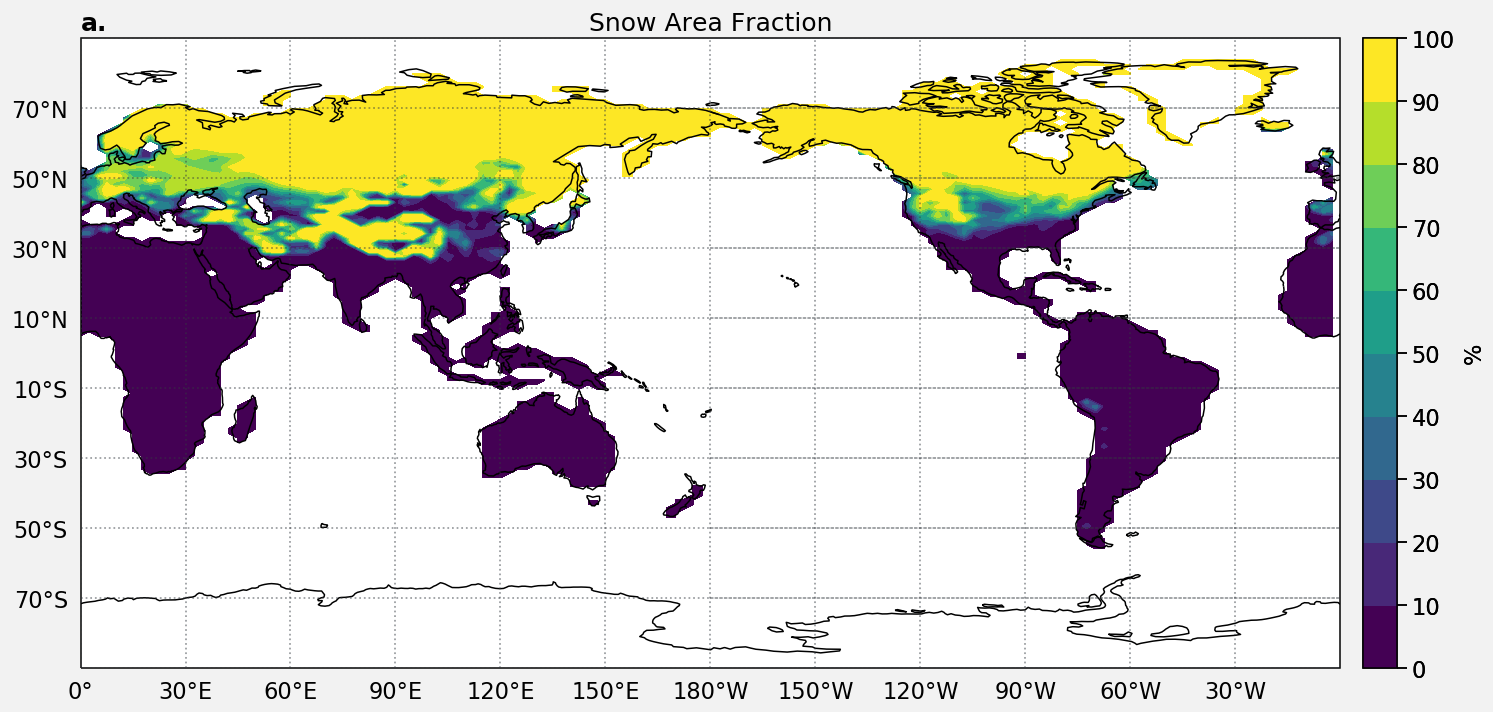

In [86]:
%matplotlib inline
f, axs = plot.subplots(proj='cyl', proj_kw={'lon_0':180}, axwidth=7)
axs.format(
    geogridlinewidth=0.7, geogridcolor='gray8', geogridalpha=0.5, labels=True,
    coast=True, abc=True, abcstyle='a.'
)
m = axs[0].contourf(da, cmap='viridis')
f.colorbar(m, label='%')

# f.save('proplot.jpg')

## Cartopy

<IPython.core.display.Javascript object>


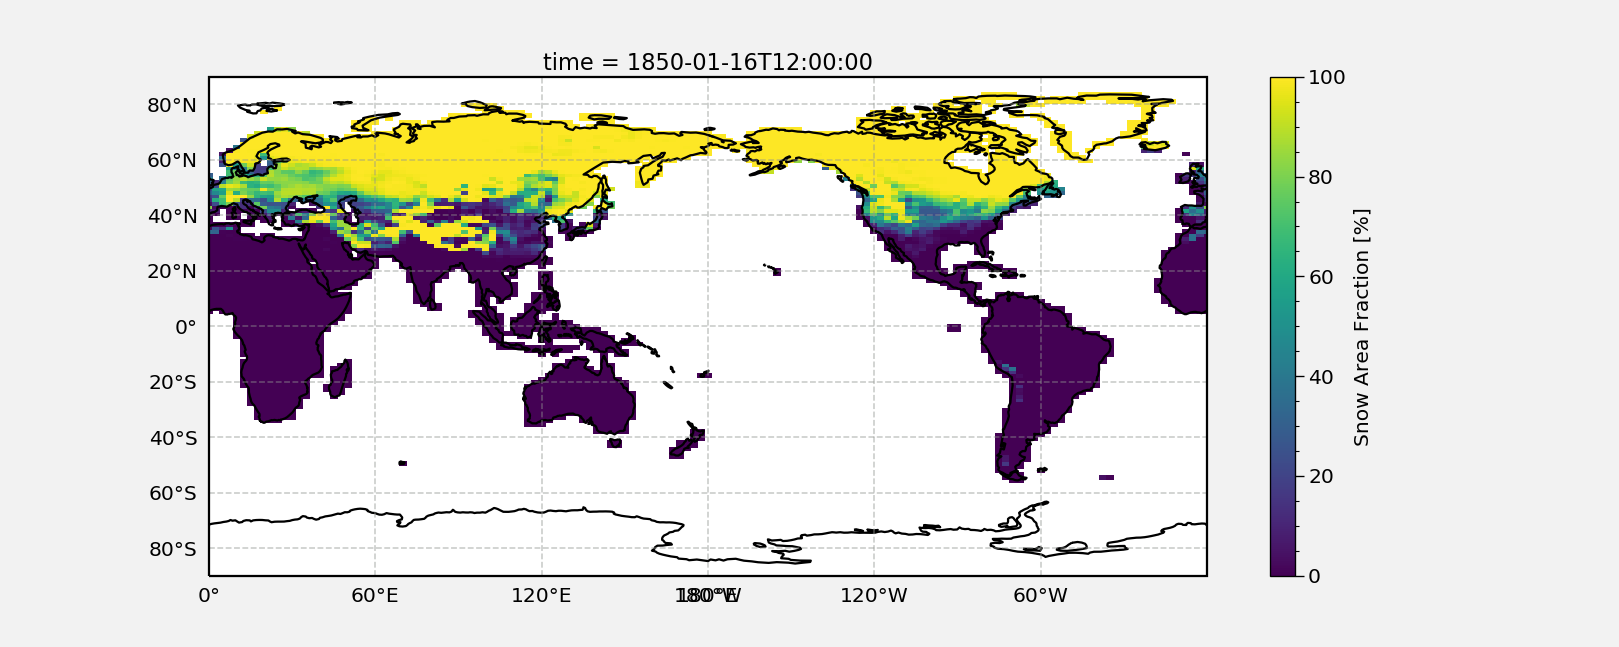

In [87]:
%matplotlib notebook
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree(180))

da.plot(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines()
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# plt.savefig('longitude_overlap.jpg', bbox_inches='tight', dpi=300)

## Contourf does not add cyclic point #1402
https://github.com/SciTools/cartopy/issues/1402

<IPython.core.display.Javascript object>


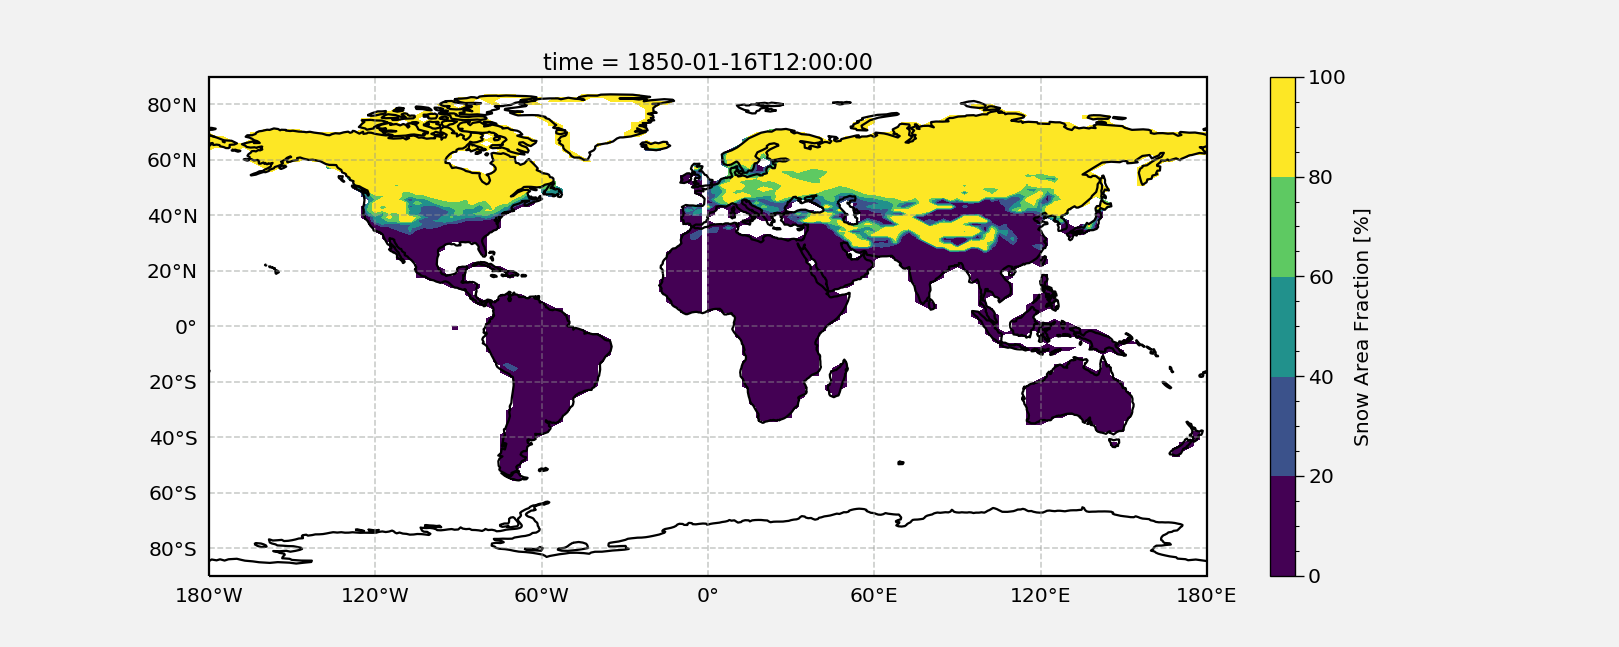

In [88]:
plt.figure(figsize=(10,4))

ax = plt.axes(projection=ccrs.PlateCarree())

da.plot.contourf(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines()
ax.set_global()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.7, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# plt.savefig('contourf_add_cycle.jpg', bbox_inches='tight', dpi=300)